# Environment set up

In [1]:
!pip install numpy matplotlib scipy numba scikit-learn mne PyWavelets pandas autoreject mne-features torcheeg

In [4]:
! pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
  Using cached https://download.pytorch.org/whl/cu113/torch-1.11.0%2Bcu113-cp310-cp310-linux_x86_64.whl (1637.0 MB)
  Using cached https://download.pytorch.org/whl/cu113/torchvision-0.12.0%2Bcu113-cp310-cp310-linux_x86_64.whl (22.3 MB)
  Using cached https://download.pytorch.org/whl/cu113/torchaudio-0.11.0%2Bcu113-cp310-cp310-linux_x86_64.whl (2.9 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu117
    Uninstalling torchvision-0.14.1+cu117:
      Successfully uninstalled torchvision-0.14.1+cu117
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.13.1+cu117
    Uninstalling torchaudio-0.13.1+cu117:
      Successfully uninstalled torchaudio-0.13.1+cu117
ERROR: pip's dependency resol

In [18]:
!pip install torch==2.0.0 torchaudio==2.0.1 torchvision==0.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 40.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.0.0
    Uninstalling torchaudio-2.0.0:
      Successfully uninstalled torchaudio-2.0.0


In [19]:
import torch
torch.has_mps

False

In [26]:
import os
import mne
import numpy as np
import pandas as pd
from autoreject import AutoReject
import timeit
import torch
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [72]:
!pip install torch

# Get data

In [27]:
# sample data
# import gdown
# !gdown 1RCHit--cMXX-qde5i0kHmJuSnEaQMGGr

In [28]:
# real data TDBRAIN
# !gdown 1LxJtBcaXYsB9Q306ysaZzBF7vObMaktt
# !unzip -P '!Bra1n$Rgr3at:)' /content/TDBRAIN-dataset.zip

In [29]:
# metadata
# !gdown --folder 1tDXSxIBMlnUZU6wADPZSAt9pHQ2znDvb

# Data Exploration

## Sample data

## Real data

In [30]:
metadata = pd.read_table('//home/ubuntu/nss/nss_data/TD-BRAIN/TD-BRAIN-DATASET/participants.tsv')
pd.set_option('display.max_columns', None)
metadata

,subID,indication,formal Dx,Dataset,Consent,sessSeason,sessTime,age,gender,sessID,nrSessions,EC,EO,neoFFI_q1,neoFFI_q2,neoFFI_q3,neoFFI_q4,neoFFI_q5,neoFFI_q6,neoFFI_q7,neoFFI_q8,neoFFI_q9,neoFFI_q10,neoFFI_q11,neoFFI_q12,neoFFI_q13,neoFFI_q14,neoFFI_q15,neoFFI_q16,neoFFI_q17,neoFFI_q18,neoFFI_q19,neoFFI_q20,neoFFI_q21,neoFFI_q22,neoFFI_q23,neoFFI_q24,neoFFI_q25,neoFFI_q26,neoFFI_q27,neoFFI_q28,neoFFI_q29,neoFFI_q30,neoFFI_q31,neoFFI_q32,neoFFI_q33,neoFFI_q34,neoFFI_q35,neoFFI_q36,neoFFI_q37,neoFFI_q38,neoFFI_q39,neoFFI_q40,neoFFI_q41,neoFFI_q42,neoFFI_q43,neoFFI_q44,neoFFI_q45,neoFFI_q46,neoFFI_q47,neoFFI_q48,neoFFI_q49,neoFFI_q50,neoFFI_q51,neoFFI_q52,neoFFI_q53,neoFFI_q54,neoFFI_q55,neoFFI_q56,neoFFI_q57,neoFFI_q58,neoFFI_q59,neoFFI_q60,avg_rt_oddb_CP,avg_rt_oddb_FP,n_oddb_CP,n_oddb_FP,n_oddb_CN,n_oddb_FN,avg_rt_wm_CP,avg_rt_wm_FP,n_wm_CP,n_wm_FP,n_wm_CN,n_wm_FN,cigarette,coffee,beer,drugs,education,meal,sleep,well,vision,hearing,Weight (kg),Height (cm),BDI Pre (Becks depression inventory - NL),BDI post,rTMS PROTOCOL,ADHD_pre_Hyp_leading,ADHD_pre_Att_leading,ADHD_post_Hyp_leading,ADHD_post_Att_leading,NF Protocol
0,87963457,BURNOUT,BURNOUT,NaN,YES,spring,afternoon,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.298,0.310,62.0,1.0,285.0,0.0,0.445,0.460,22.0,1.0,46.0,0.0,99.0,99.0,99.0,99.0,99.0,3.0,9.0,1.0,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,87963593,BURNOUT,BURNOUT,NaN,YES,spring,morning,52.90,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337,NaN,61.0,0.0,286.0,1.0,0.685,NaN,21.0,0.0,49.0,1.0,99.0,9.0,10.0,0.0,13.0,3.0,7.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87963725,SMC,NaN,NaN,YES,summer,afternoon,77.99,0,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.354,NaN,62.0,0.0,286.0,0.0,0.437,NaN,22.0,0.0,48.0,0.0,99.0,9.0,15.0,0.0,13.0,1.0,3.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,87963769,SMC,NaN,NaN,YES,summer,afternoon,83.30,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.303,0.688,62.0,1.0,285.0,0.0,0.537,0.745,21.0,2.0,47.0,1.0,99.0,9.0,15.0,0.0,18.0,4.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87964717,SMC,NaN,NaN,YES,summer,afternoon,58.29,0,1,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.351,NaN,62.0,0.0,286.0,0.0,0.642,NaN,21.0,0.0,49.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,88078657,INSOMNIA,INSOMNIA,NaN,YES,fall,NaN,58.59,1,1,1,1,1,2.0,3.0,5.0,2.0,4.0,2.0,3.0,5.0,3.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,4.0,1.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,1.0,3.0,2.0,2.0,3.0,4.0,4.0,3.0,1.0,3.0,5

In [31]:
metadata = metadata[["subID", "gender"]].dropna(how="any")
metadata

,subID,gender
0,87963457,0
1,87963593,1
2,87963725,0
3,87963769,1
4,87964717,0
...,...,...
1341,88078657,1
1342,88078749,0
1343,88078793,1
1344,88078837,1


In [32]:
#select only session 1 so that repeated session for one person would not be in analysis?
all_ses1_files = []
for root, dirs, files in os.walk("//home/ubuntu/nss/nss_data/TD-BRAIN/TD-BRAIN-DATASET/Processed-BC-notch_50_full"):
    for file in files:
        if file.endswith(".npy") and "EC" in file: #filtered data and closed eyes
             all_ses1_files.append(os.path.join(root, file))

for path in all_ses1_files:
    index = metadata.loc[metadata["subID"]==int(path[100:108])].index
    if len(index) > 0:
        metadata.loc[metadata.index[index[0]], 'path'] = path

#gender_list = []
#for participant in participants_list:
    #a = (metadata.loc[(metadata["subID"]) == participant, "gender"]).values
   # if len(a) > 0:
       # gender_list.append(int(a[0]))
   # else:
       # print(participants_list.index(participant))
       # epochs.remove(epochs[participants_list.index(participant)])

metadata_list_d = []
for i in range(metadata.shape[0]):
    metadata_dictionary = {}
    metadata_dictionary['subject'] = metadata["subID"][i]
    metadata_dictionary['gender'] = metadata["gender"][i]
    metadata_list_d.append(metadata_dictionary)

# metadata_list_d
# separate experiments with closed and open eyes
# ses1_closed_eyes = []
# ses1_open_eyes = []
# for i in all_ses1_files:
#   if "EC" in i:
#     ses1_closed_eyes.append(i)
#   else:
#     ses1_open_eyes.append(i)

In [33]:
helper = pd.read_table('/home/ubuntu/nss/nss_data/TD-BRAIN/TD-BRAIN-DATASET/Processed-BC-notch_50_full/88079017/88079017-1/88079017-1_EO_eeg.tsv')
ch_names = list(helper.name[:26])

info = mne.create_info(ch_names = ch_names, ch_types='eeg', sfreq = 500)

In [34]:
tdbrain = []
# channels_to_drop = ["VPVA",	"VNVB",	"HPHL",	"HNHR",	"Erbs",	"OrbOcc",	"Mass"]

for i, file in enumerate(metadata.path):
    df = np.load(all_ses1_files[i])
    df = df[:(len(ch_names)), :] #

    raw = mne.io.RawArray(df, info, first_samp=0, copy='auto', verbose=None)
    raw.resample(sfreq=250)
    tdbrain.append(raw)

Creating RawArray with float64 data, n_channels=26, n_times=60323
    Range : 0 ... 60322 =      0.000 ...   120.644 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=60008
    Range : 0 ... 60007 =      0.000 ...   120.014 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=59825
    Range : 0 ... 59824 =      0.000 ...   119.648 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=60012
    Range : 0 ... 60011 =      0.000 ...   120.022 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=59823
    Range : 0 ... 59822 =      0.000 ...   119.644 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=60015
    Range : 0 ... 60014 =      0.000 ...   120.028 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=60008
    Range : 0 ... 60007 =      0.000 ...   120.014 secs
Ready.
Creating RawArray with float64 data, n_channels=26, n_times=60018
    Range : 0 ... 60017 =      

In [35]:
tdbrain[0]

<RawArray | 26 x 30162 (120.6 s), ~6.0 MB, data loaded>

In [36]:
tdbrain[0].to_data_frame()

,time,Fp1,Fp2,F7,F3,Fz,F4,F8,FC3,FCz,FC4,T7,C3,Cz,C4,T8,CP3,CPz,CP4,P7,P3,Pz,P4,P8,O1,Oz,O2
0,0.000,9.688425e+06,1.066308e+07,8.461457e+06,1.114395e+07,1.165667e+07,8.541617e+06,4.891761e+06,1.166252e+07,1.046861e+07,5.768383e+06,7.809121e+06,1.218166e+07,9.237073e+06,5.898687e+06,4.089594e+05,8.253694e+06,3.590565e+06,5.195553e+06,3.795660e+06,2.653546e+06,-1.028124e+06,1.756953e+06,-7.793230e+06,-2.308030e+06,-3.763793e+06,-6.230873e+06
1,0.004,6.964078e+06,3.926532e+06,8.377457e+06,1.357526e+07,8.457506e+06,1.631986e+06,-6.286628e+05,9.516237e+06,8.323341e+06,4.360662e+06,8.350001e+06,8.826841e+06,5.914020e+06,1.249974e+06,-4.857013e+06,4.562735e+06,2.329700e+06,7.628465e+03,-8.930576e+04,-1.213473e+06,-1.596424e+05,-1.300144e+06,-6.805413e+05,3.402359e+05,3.143542e+06,3.429510e+06
2,0.008,-1.578433e+04,-4.174027e+06,2.448696e+06,9.085010e+05,-4.211899e+04,-1.176032e+07,-9.198886e+06,8.257593e+05,7.606539e+05,-2.032192e+06,1.484002e+06,4.858160e+05,-2.831142e+06,-8.260710e+06,-1.349149e+07,-4.888237e+06,-6.154378e+06,-1.071589e+07,-7.168708e+06,-8.421284e+06,-6.668511e+06,-1.064888e+07,2.240444e+06,-9.889180e+05,3.864945e+06,7.493448e+06
3,0.012,8.594060e+05,-2.819695e+06,2.083259e+06,-1.254693e+06,-2.133699e+05,-4.352567e+06,-9.184045e+06,1.446821e+06,-1.092508e+06,-2.680968e+06,5.645374e+05,2.249931e+05,-3.825146e+06,-8.649639e+06,-1.459697e+07,-4.606982e+06,-8.087876e+06,-1.140491e+07,-8.984359e+06,-8.029558e+06,-8.048184e+06,-1.136429e+07,3.683318e+06,-2.791364e+06,1.813000e+06,6.616700e+06
4,0.016,2.823978e+05,-5.381910e+06,-2.430557e+06,1.943659e+06,-3.911879e+06,-6.455268e+05,-1.425338e+07,5.583040e+05,-5.342062e+06,-6.851064e+06,-1.807548e+06,-2.640153e+06,-6.287515e+06,-1.097617e+07,-1.378402e+07,-7.773856e+06,-1.385010e+07,-1.347041e+07,-9.652799e+06,-1.211381e+07,-1.282891e+07,-9.867883e+06,1.304234e+07,-1.735146e+06,2.796059e+06,1.064415e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,120.628,-3.295836e+07,-2.953639e+07,-2.510805e+07,-2.627127e+07,-2.941535e+07,-2.291418e+07,-1.558305e+07,-1.670252e+07,-2.660572e+07,-2.067241e+07,-1.131165e+07,4.282069e+06,-1.757257e+07,1.023428e+07,4.756609e+06,1.835332e+07,-9.427941e+05,1.958544e+07,4.167294e+07,2.906564e+07,-6.849698e+06,7.316314e+06,8.943683e+05,1.330611e+07,-3.966946e+06,-7.065540e+06
30158,120.632,-2.902692e+07,-2.769066e+07,-2.337575e+07,-2.580465e+07,-3.023814e+07,-2.500485e+07,-1.680178e+07,-1.617427e+07,-2.628496e+07,-2.414716e+07,-1.428001e+07,-3.370140e+04,-1.855188e+07,5.398542e+06,1.285855e+06,1.360571e+07,-3.695765e+06,1.606333e+07,3.499234e+07,2.423325e+07,-8.722003e+06,5.644955e+06,-2.392982e+05,1.064365e+07,-5.183118e+06,-7.509860e+06
30159,120.636,-2.701759e+07,-2.738839e+07,-2.430798e+07,-2.639033e+07,-3.064114e+07,-2.760191e+07,-1.994681e+07,-1.846300e+07,-2.604800e+07,-2.640859e+07,-1.749947e+07,-5.845468e+06,-1.976816e+07,-2.175058e+06,-6.260525e+06,5.850685e+06,-9.064188e+06,7.917445e+06,2.515798e+07,1.472826e+07,-1.467353e+07,-6.372272e+05,-5.670895e+06,3.303718e+06,-9.944705e+06,-1.113078e+07
30160,120.640,-1.954909e+07,-2.142809e+07,-1.795562e+07,-1.875173e+07,-2.065064e+07,-2.035715e+07,-1.442155e+07,-1.354290e+07,-1.660775e+07,-1.617007e+07,-1.106622e+07,-2.994121e+06,-1.191548e+07,7.245500e+05,-3.409369e+06,6.045968e+06,-5.486537e+06,6.966962e+06,2.380121e+07,1.265148e+07,-1.056520e+07,-3.957459e+05,-3.483715e+06,5.043591e+06,-5.850593e+06,-7.628751e+06


Effective window size : 8.192 (s)


/tmp/ipykernel_468278/2930514948.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  tdbrain[0].compute_psd(fmax=100).plot(picks="data", exclude="bads")


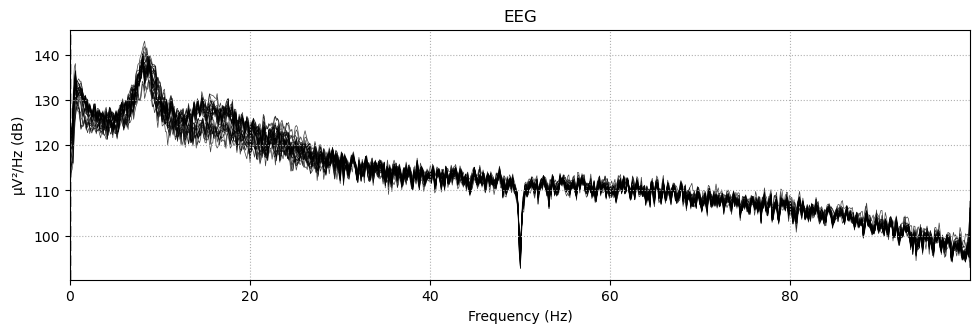

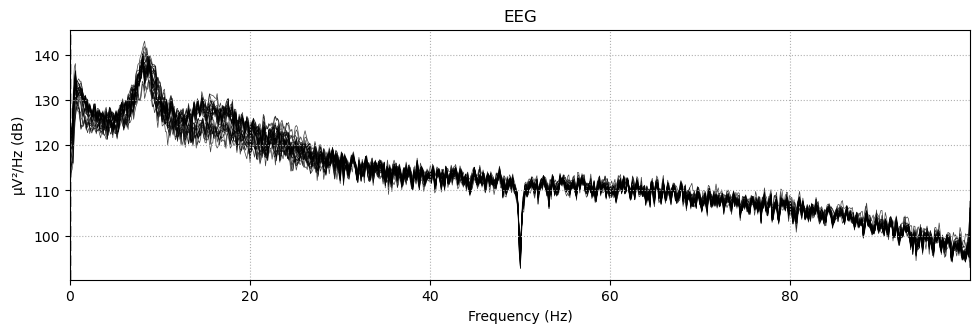

In [37]:
tdbrain[0].compute_psd(fmax=100).plot(picks="data", exclude="bads")
# tdbrain[0].plot(duration=2, n_channels=26)

In [38]:
#creating epochs
epochs = []
for i in tdbrain:
    epochs.append(mne.make_fixed_length_epochs(i, duration=4.0, overlap=0.5, preload=True, verbose=None))

#filtering epochs
#epochs_clean = []
#ar = AutoReject()
#for i in epochs:
  #epochs_clean.append(ar.fit_transform(i))

Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 1000 original time points ...
0 bad epochs dropped
Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 1000 original time points ...
0 bad epochs dropped
Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 1000 original time points ...
0 bad epochs dropped
Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 1000 original time points ...
0 bad epochs dropped
Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 1000 original time points 

In [39]:
epochs[0]

Number of events,34
Events,1: 34
Time range,0.000 – 3.996 s
Baseline,off


# Features

# Creating basic model

In [2]:
import torch
torch.has_mps

False

In [78]:
from torch import mps as mps

ImportError: cannot import name 'mps' from 'torch' (/home/ubuntu/conda3/envs/nss/lib/python3.10/site-packages/torch/__init__.py)

In [ ]:
import logging
import os
import random
import time

import mne
import numpy as np
import torch
from torch.utils.data.dataloader import DataLoader
from torcheeg import transforms
from torcheeg.datasets import MNEDataset
from torcheeg.model_selection import KFold, KFoldPerSubject, LeaveOneSubjectOut, KFoldCrossSubject
from torcheeg.models import EEGNet, TSCeption, GRU, ViT
from torcheeg.trainers import ClassificationTrainer

In [ ]:
os.getcwd()

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


seed_everything(42)

In [52]:
os.makedirs('./tmp_out/examples_mne_dataset/log', exist_ok=True)
logger = logging.getLogger('Examples of MNEDataset')
logger.setLevel(logging.DEBUG)
console_handler = logging.StreamHandler()
timeticks = time.strftime("%Y-%m-%d-%H-%M-%S", time.localtime())
file_handler = logging.FileHandler(
    os.path.join('./tmp_out/examples_mne_dataset/log', f'{timeticks}.log'))
logger.addHandler(console_handler)
logger.addHandler(file_handler)

In [54]:
class MyClassificationTrainer(ClassificationTrainer):
    def log(self, *args, **kwargs):
        if self.is_main:
            logger.info(*args, **kwargs)

In [55]:
len(metadata_list_d), len(epochs)

(1346, 1346)

In [56]:
!rm -rf ./tmp_out/examples_mne_dataset/tdbrain
dataset = MNEDataset(epochs_list=epochs,
                     metadata_list=metadata_list_d,
                     io_path='./tmp_out/examples_mne_dataset/tdbrain',
                     chunk_size=250,
                     overlap=125,
                     io_size=20000000000,
                     offline_transform=transforms.Compose(
                         [transforms.MeanStdNormalize(),
                          transforms.To2d()]),
                     online_transform=transforms.ToTensor(),
                     label_transform=transforms.Compose([
                         transforms.Select('gender')
                         ]),
                     num_worker=2)

[MNE]: 100%|█████████████████████████████████████████████| 1346/1346 [04:18<00:00,  5.20it/s]


Please wait for the writing process to complete...


In [64]:
print(dataset[0])
    # EEG signal (torch.Tensor[60, 4]),
    # coresponding baseline signal (torch.Tensor[60, 4]),
    # label (int)

(tensor([[[ 0.2206,  0.0904, -0.2432,  ..., -0.8788, -0.4422, -0.5802],
         [ 0.2672, -0.0548, -0.4419,  ..., -0.6426, -0.5283, -0.5698],
         [ 0.1620,  0.1580, -0.1254,  ..., -0.6660, -0.6913, -1.0854],
         ...,
         [-0.3528, -0.2262, -0.2897,  ...,  0.5710,  0.7411,  0.8402],
         [-0.4223, -0.0922, -0.0577,  ...,  0.7704,  0.9085,  0.9497],
         [-0.5403, -0.0785,  0.1157,  ...,  1.4051,  1.6044,  1.6011]]]), 0)


In [65]:
dataset

MNEDataset(
    io_path='./tmp_out/examples_mne_dataset/tdbrain',
    io_size=20000000000,
    io_mode='lmdb',
    in_memory=False,
    chunk_size=250,
    overlap=125,
    num_channel=-1,
    online_transform=ToTensor(apply_to_baseline=False),
    offline_transform=Compose(
    MeanStdNormalize(apply_to_baseline=False, mean=None, std=None, axis=None),
    To2d(apply_to_baseline=False)
),
    label_transform=Compose(
    Select(key='gender')
),
    before_trial=None,
    after_trial=None,
    num_worker=2,
    verbose=True
)
length=320460

In [66]:
# k_fold = KFold(n_splits=5, split_path='./tmp_out/examples_mne_dataset/split')

In [67]:
k_fold_subj = KFoldCrossSubject(n_splits=5, shuffle=True, split_path='./tmp_out/examples_mne_dataset/split')

In [68]:
# !ls ./tmp_out/examples_mne_dataset/split

In [69]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [70]:
for i, (train_dataset, val_dataset) in enumerate(k_fold_subj.split(dataset)):
    # Initialize the model

    model = TSCeption(num_electrodes=26,
                      num_classes=2,
                      num_T=15,
                      num_S=15,
                      in_channels=1,
                      hid_channels=32,
                      sampling_rate=250,
                      dropout=0.5)

    # Initialize the trainer and use the 0-th GPU for training, or set device_ids=[] to use CPU
    trainer = MyClassificationTrainer(model=model,
                                      lr=1e-4,
                                      weight_decay=1e-4,
                                      device_ids=[0])

    # Initialize several batches of training samples and test samples
    train_loader = DataLoader(train_dataset,
                              batch_size=70,
                              shuffle=True,
                              num_workers=6)
    val_loader = DataLoader(val_dataset,
                            batch_size=70,
                            shuffle=False,
                            num_workers=6)

    # Do 50 rounds of training
    trainer.fit(train_loader, val_loader, num_epochs=100)
    trainer.test(val_loader)


Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Process Process-11:
Traceback (most recent call last):
  File "/home/ubuntu/conda3/envs/nss/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Process Process-12:
  File "/home/ubuntu/conda3/envs/nss/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/conda3/envs/nss/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 225, in _worker_loop
    global _worker_info
Traceback (most recent call last):
  File "/home/ubuntu/conda3/envs/nss/lib/python3.10/site-packages/torch/random.py", line 42, in manual_seed
    return default_generator.manual_seed(seed)
  File "/home/ubuntu/conda3/envs/nss/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
ModuleNotFoundError: No module named 'torch.mps'
  File "/home/ubuntu/conda3/en

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/ubuntu/conda3/envs/nss/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_468278/284875479.py", line 30, in <module>
    trainer.fit(train_loader, val_loader, num_epochs=100)
  File "/home/ubuntu/conda3/envs/nss/lib/python3.10/site-packages/torcheeg/trainers/classification_trainer.py", line 223, in fit
    super().fit(train_loader=train_loader,
  File "/home/ubuntu/conda3/envs/nss/lib/python3.10/site-packages/torcheeg/trainers/basic_trainer.py", line 254, in fit
    for batch_id, train_batch in enumerate(train_loader):
  File "/home/ubuntu/conda3/envs/nss/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 441, in __iter__
    #        set those flags correctly.
  File "/home/ubuntu/conda3/envs/nss/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 388, in _get_iterator
    # NOTE [ IterableDatas

In [71]:
for i, (train_dataset, val_dataset) in enumerate(k_fold_subj.split(dataset)):
    # Initialize the model

    model = TSCeption(num_electrodes=26,
                      num_classes=2,
                      num_T=25,
                      num_S=25,
                      in_channels=1,
                      hid_channels=32,
                      sampling_rate=250,
                      dropout=0.5)

    # Initialize the trainer and use the 0-th GPU for training, or set device_ids=[] to use CPU
    trainer = MyClassificationTrainer(model=model,
                                      lr=1e-4,
                                      weight_decay=1e-4,
                                      device_ids=[0])

    # Initialize several batches of training samples and test samples
    train_loader = DataLoader(train_dataset,
                              batch_size=70,
                              shuffle=True,
                              num_workers=6)
    val_loader = DataLoader(val_dataset,
                            batch_size=70,
                            shuffle=False,
                            num_workers=6)

    # Do 50 rounds of training
    trainer.fit(train_loader, val_loader, num_epochs=100)
    trainer.test(val_loader)

Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Process Process-17:
Traceback (most recent call last):
  File "/home/ubuntu/conda3/envs/nss/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ubuntu/conda3/envs/nss/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/conda3/envs/nss/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 225, in _worker_loop
    global _worker_info
  File "/home/ubuntu/conda3/envs/nss/lib/python3.10/site-packages/torch/random.py", line 42, in manual_seed
    return default_generator.manual_seed(seed)
ModuleNotFoundError: No module named 'torch.mps'
Process Process-18:
Traceback (most recent call last):
  File "/home/ubuntu/conda3/envs/nss/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/ubuntu/conda3/en

RuntimeError: DataLoader worker (pid(s) 476162, 476196, 476242, 476288, 476347) exited unexpectedly

In [ ]:
for train_dataset, val_dataset in k_fold_subj.split(dataset):
    # Initialize the model

    model = EEGNet(chunk_size=250,
               num_electrodes=26,
               dropout=0.5,
               kernel_1=64,
               kernel_2=64,
               F1=8,
               F2=16,
               D=2,
               num_classes=2)

    # Initialize the trainer and use the 0-th GPU for training, or set device_ids=[] to use CPU
    trainer = MyClassificationTrainer(model=model,
                                      lr=1e-4,
                                      weight_decay=1e-4,
                                      device_ids=[0])

    # Initialize several batches of training samples and test samples
    train_loader = DataLoader(train_dataset,
                              batch_size=70,
                              shuffle=True,
                              num_workers=6)
    val_loader = DataLoader(val_dataset,
                            batch_size=70,
                            shuffle=False,
                            num_workers=6)

    # Do 50 rounds of training
    trainer.fit(train_loader, val_loader, num_epochs=100)
    trainer.test(val_loader)

In [ ]:
for train_dataset, val_dataset in k_fold_subj.split(dataset):
    # Initialize the model

    model = EEGNet(chunk_size=250,
               num_electrodes=26,
               dropout=0.5,
               kernel_1=64,
               kernel_2=64,
               F1=16,
               F2=32,
               D=3,
               num_classes=2)

    # Initialize the trainer and use the 0-th GPU for training, or set device_ids=[] to use CPU
    trainer = MyClassificationTrainer(model=model,
                                      lr=1e-4,
                                      weight_decay=1e-4,
                                      device_ids=[0])

    # Initialize several batches of training samples and test samples
    train_loader = DataLoader(train_dataset,
                              batch_size=70,
                              shuffle=True,
                              num_workers=6)
    val_loader = DataLoader(val_dataset,
                            batch_size=70,
                            shuffle=False,
                            num_workers=6)

    # Do 50 rounds of training
    trainer.fit(train_loader, val_loader, num_epochs=100)
    trainer.test(val_loader)